In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Get data for all Test matches (March 8, 2004 - December 26, 2021) - compiled together from Cricsheet
data = pd.read_csv('all_matches.csv')

In [3]:
def get_player_avg_by_year(player):
    # Get all balls faced by the player (in order)
    player_balls_faced = data[data['striker'] == player].sort_values(['start_date', 'innings', 'ball'])

    # Convert the match dates to pandas datetime for grouping runs scored by year
    player_balls_faced['start_date'] = pd.to_datetime(player_balls_faced['start_date'])
    player_runs_by_year = player_balls_faced.groupby(player_balls_faced['start_date'].dt.year)['runs_off_bat'].sum()

    # Get all instances of the player being dismissed (in order)
    player_wickets = data[data['player_dismissed'] == player].sort_values(['start_date', 'innings', 'ball'])

    # Convert the match dates to pandas datetime for grouping number of dismissals by year
    player_wickets['start_date'] = pd.to_datetime(player_wickets['start_date'])
    player_wickets_by_year = player_wickets.groupby(player_wickets['start_date'].dt.year)['player_dismissed'].count()
    
    # Return the averages
    return (player_runs_by_year / player_wickets_by_year)

In [4]:
# Set basic info for the desired players
player_1, player_2, player_3 = ('CA Pujara', 'V Kohli', 'AM Rahane')
player_1_full_name, player_2_full_name, player_3_full_name = ('Cheteshwar Pujara', 'Virat Kohli', 'Ajinkya Rahane')
player_1_short_name, player_2_short_name, player_3_short_name = ('Pujara', 'Kohli', 'Rahane')

# Get their averages by year
player_1_avg_by_year = get_player_avg_by_year(player_1)
player_2_avg_by_year = get_player_avg_by_year(player_2)
player_3_avg_by_year = get_player_avg_by_year(player_3)

In [5]:
# Get the list of common years
player_years = player_1_avg_by_year.keys() & player_2_avg_by_year.keys() & player_3_avg_by_year.keys()

# Filter out the required averages
player_1_avg_by_year = player_1_avg_by_year[player_1_avg_by_year.keys() >= min(player_years)]
player_2_avg_by_year = player_2_avg_by_year[player_2_avg_by_year.keys() >= min(player_years)]
player_3_avg_by_year = player_3_avg_by_year[player_3_avg_by_year.keys() >= min(player_years)]

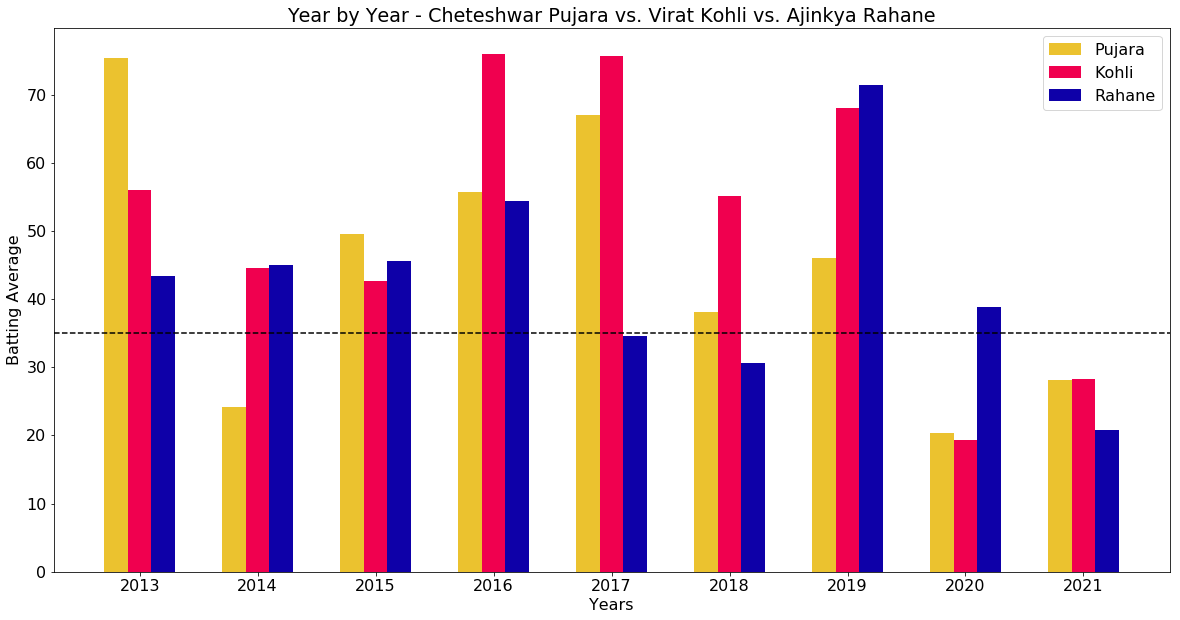

In [6]:
# Set up the plot
plt.figure(figsize = (20, 10))
plt.rcParams.update({'font.size': 16})
plt.title('Year by Year - ' + player_1_full_name + ' vs. ' + player_2_full_name + ' vs. ' +  player_3_full_name)
plt.xlabel('Years')
plt.ylabel('Batting Average')
bar_width = 0.2
player_1_color, player_2_color, player_3_color = ('#ebc22f', '#f0004f', '#0e00a8')

# Plot the year by year batting average of the players
plt.bar(player_years - bar_width, player_1_avg_by_year, bar_width, color = player_1_color)
plt.bar(player_years, player_2_avg_by_year, bar_width, color = player_2_color)
plt.bar(player_years + bar_width, player_3_avg_by_year, bar_width, color = player_3_color)
plt.legend([player_1_short_name, player_2_short_name, player_3_short_name])

# Set the tick frequency for x-axis
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

# Mark the average of 35 for comparison purposes    
plt.axhline(35, color = 'black', linestyle = '--')

# Display the plot
plt.show()